In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
from sklearn import datasets

In [127]:
iris_d = pd.DataFrame(iris.data, columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])

In [128]:
iris_d["class"] = iris.target

In [129]:
iris_d

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [130]:
iris_d.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [131]:
iris_d.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [132]:
iris_d.isna().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [133]:
iris_d.shape

(150, 5)

In [134]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [135]:
iris_d['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [136]:
iris_4 = iris_d.iloc[0:4, :]

In [137]:
iris_4

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


# Visualizations of the features in the dataset

<AxesSubplot:xlabel='class', ylabel='Count'>

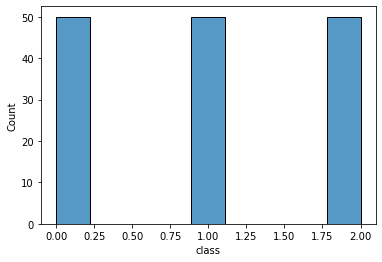

In [138]:
#Bar plot for frequencies of the species
import seaborn as sns
sns.histplot(iris_d["class"])

Text(0.5, 1.0, 'pie chart')

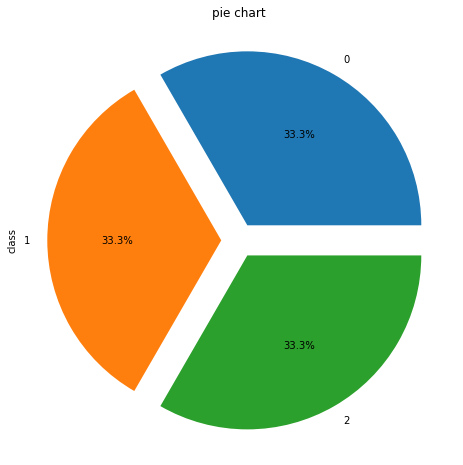

In [139]:
plt.subplots(1,1)
iris_d["class"].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%', figsize = (10,8))
plt.title("pie chart")

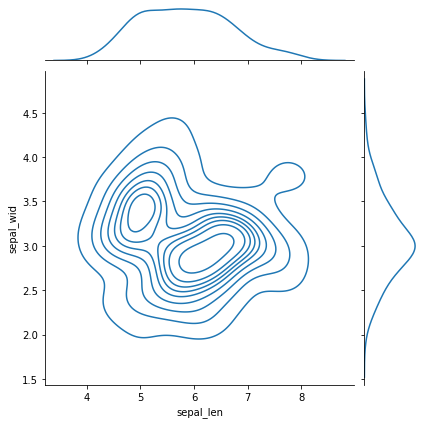

In [140]:
sns.jointplot(data = iris_d, x= "sepal_len", y = "sepal_wid", kind = "kde")

In [106]:
from sklearn.model_selection import train_test_split
X= iris_d.iloc[:, 0:4].values
y = iris_d.iloc[:,4].values

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [142]:
X_train.shape

(120, 4)

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier(n_neighbors=5)

In [145]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [147]:
predictions = knn.predict(X_test)

In [146]:
Acc_score = knn.score(X_test,y_test)
Acc_score

0.9666666666666667

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## for different values of K

In [156]:
for i in np.arange(1,10):
    Knn2 = KNeighborsClassifier(n_neighbors=i)
    Knn2.fit(X_train,y_train)
    print(f'for k={i}:{Knn2.score(X_test,y_test)}')


for k=1:0.9666666666666667
for k=2:1.0
for k=3:0.9666666666666667
for k=4:0.9666666666666667
for k=5:0.9666666666666667
for k=6:1.0
for k=7:1.0
for k=8:1.0
for k=9:1.0


# Logistic regression for the same dataset

In [157]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [167]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [168]:
predictions_lr = model_lr.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [169]:
print(confusion_matrix(y_test,predictions_lr))

[[14  0  0]
 [ 0  9  0]
 [ 0  2 13]]


In [170]:
print('The accuracy of the Logistic Regression is', accuracy_score(predictions_lr,y_test))

The accuracy of the Logistic Regression is 0.9473684210526315
